#### Demo contents
* draw a figure
* show diagram from general usage (Figure, Axes, Axis, Artist)
* show high-level API (state machine like)
    * functions on plt
    * subplots
    * xlabel, xlim
    * title, legends
    * some other ready-to-use functions
        * hist, boxplot, barchart
        * autocorrelation
* show OO approach
    * methods on each of Figure, Axes, Axis, Annotations
* some examples with styles and annotations


# Usage in jupyter notebook

In [1]:
## INIT: usual way to display plots inline and import the matplotlib library
%matplotlib inline

# default value is 'tight', can be made more relaxed about spacing
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

import numpy as np
import matplotlib.pyplot as plt

# set the format of the embedded figures (specific to the 'inline' backend)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png', 'svg')

## Simple 2-plot figure with title and labels

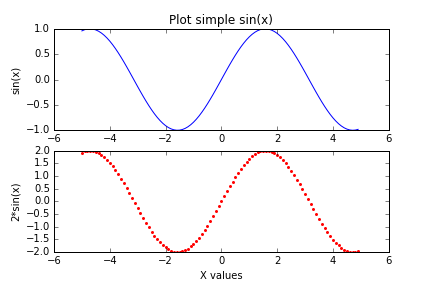

In [2]:
## generate some dummy data
x = np.arange(-5, 5, .1)
y = np.sin(x)

## let's create two plots in a row 
# define the 2 plots, use the 1st as active
plt.subplot(2, 1, 1)
plt.plot(x,y)
# plt.xlabel("X values")
plt.ylabel("sin(x)")
plt.title("Plot simple sin(x)")
# activate the 2nd plot within the figure
plt.subplot(2, 1, 2)
plt.plot(x, 2*y, "ro", markersize=3, markeredgecolor='none')
plt.xlabel("X values")
# ,bbox=dict(facecolor='red', alpha=0.3), x=0, y=-.2 ;
plt.ylabel("2*sin(x)");

## Main concepts in Matplotlib
![test](./figs/matplotlib_fig_map.png)

Source: http://matplotlib.org/1.5.1/faq/usage_faq.html#parts-of-a-figure

- Figure (`matplotlib.figure.Figure`)
> top level container for all plot elements
- Axes (`matplotlib.axes._axes.Axes`)
> The `Axes` contains most of the figure elements:
> `~matplotlib.axis.Axis`, `~matplotlib.axis.Tick`,
> `~matplotlib.lines.Line2D`, `~matplotlib.text.Text`,
> `~matplotlib.patches.Polygon`, etc., and sets the
> coordinate system.
- Axis and Tick (`matplotlib.axis.Axis` and `matplotlib.axis.Tick`)
> It represents the axis within the plot, sets the limits and controls 
> how the ticks are displayed (formatting, minor and major ticks)

## *State-machine* behaviour (from command line) 

In [3]:
# set the backend to osx (on Mac, would be different on other OS...)
%matplotlib

Using matplotlib backend: MacOSX


### Get some data

In [4]:
import pandas as pd
houses = pd.read_csv(filepath_or_buffer='bp_flats.csv')
houses.head(10)

,Flatcount,1946,1960,1970,1980,1990,2000,2005,2011,District
0,1,57,9,10,5,9,6,1,1,1
1,2,44,6,2,1,3,1,0,1,1
2,3,36,2,4,3,2,2,0,1,1
3,4,54,3,4,2,1,1,2,0,1
4,5-10,240,21,60,28,15,13,2,4,1
5,11-20,231,21,80,26,14,13,3,4,1
6,21-50,151,14,32,7,3,9,5,1,1
7,51-,16,1,1,1,1,0,0,0,1
8,1,1170,343,440,925,1648,1482,524,333,2
9,2,431,88,116,246,285,159,39,37,2


In [5]:
small_flats = houses[ houses['Flatcount'].isin(['1', '2']) ].groupby('District').sum()

### Simple plots (with default backend)

In [6]:
%matplotlib
plt.isinteractive()

Using matplotlib backend: MacOSX


True

In [7]:
## create 3 different figures to compare the number of small houses at 3 
## things to show: use figure(), hist() and show()
plt.figure()
plt.hist(small_flats['2000'].values, bins=15)
plt.title("# small houses in 2000")
plt.show();

In [8]:
plt.figure()
plt.hist(small_flats['2005'].values, bins=15, color="g")
plt.title("# small houses in 2005")
plt.show()

Okay, it is far from ideal to compare distributions on separate figures... Try subplots...

In [9]:
plt.subplot(2, 1, 1)

In [10]:
plt.hist(small_flats['2005'].values, color='g', bins=15)

(array([ 7.,  2.,  3.,  3.,  2.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,
         0.,  1.]),
 array([    0. ,    91.2,   182.4,   273.6,   364.8,   456. ,   547.2,
          638.4,   729.6,   820.8,   912. ,  1003.2,  1094.4,  1185.6,
         1276.8,  1368. ]),
 <a list of 15 Patch objects>)

In [11]:
plt.title("# of houses in 2005")
plt.xlabel("# of houses with 1 or 2 flats")

In [12]:
plt.show()

In [13]:
plt.subplot(2,1,2)
plt.title("# of houses in 2011");

Well, that's a bit clumsy with the overlaps...

In [14]:
plt.subplots_adjust(hspace=.4)
plt.show()

In [15]:
plt.hist(small_flats['2011'].values, color='lightgreen', bins=15)
plt.show()

In [16]:
plt.subplot(2,1,1)
xmin1, xmax1 = plt.xlim()
print("x limits on first plot", (xmin1, xmax1))
plt.subplot(2,1,2)
print("x limits on first plot", plt.xlim())

x limits on first plot (0.0, 1400.0)
x limits on first plot (0.0, 1200.0)


In [17]:
plt.xlim(xmin1,xmax1)
plt.show()

Well, well, good idea but it just does not work out this way... try something different.

In [18]:
# close current figure
plt.close()
# switch to inline plotting
%matplotlib inline
set_matplotlib_formats('pdf', 'png', 'svg')

## OO interfaces

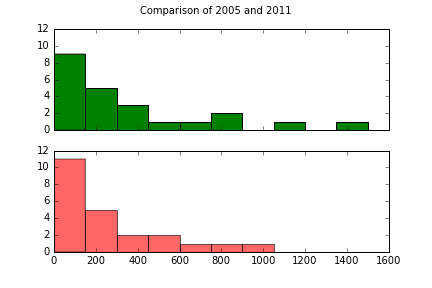

In [129]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)
common_bins = np.arange(
    np.min(small_flats[['2005','2011']].values), 
    np.max(small_flats[['2005','2011']].values) + 150, 150)

ax0 = axes[0]
ax0.hist(small_flats['2005'], bins=common_bins, color="g")

ax1 = axes[1]
ax1.hist(small_flats['2011'], bins=common_bins, color="r", alpha=.6)

fig.suptitle("Comparison of 2005 and 2011")

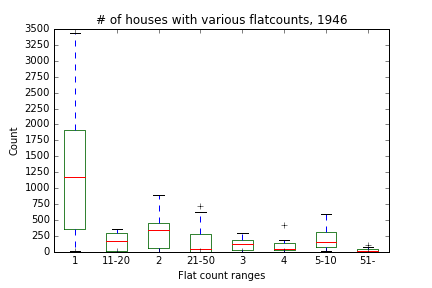

In [127]:
# collect some data
vals = []
labels = []
for k, group in houses.groupby('Flatcount'):
    vals.append(group["1946"].values)
    labels.append(k)


fig = plt.figure()
ax = fig.gca()

ax.boxplot(vals, labels=labels, boxprops=dict(color="darkgreen",linewidth=.8));

ax.set_title("# of houses with various flatcounts, 1946")
ax.set_xlabel("Flat count ranges")
ax.set_ylabel("Count")
# set the y tick on each 250
ax.set_yticks(ticks=np.arange(0,np.max(vals)+250,250));